# Massachusetts Education Data
    By: Andrew Ellis

In [85]:
!pip install -U pandasql;
!pip install --upgrade pip

Requirement already up-to-date: pandasql in /opt/conda/lib/python3.6/site-packages
Requirement already up-to-date: pandas in /opt/conda/lib/python3.6/site-packages (from pandasql)
Requirement already up-to-date: sqlalchemy in /opt/conda/lib/python3.6/site-packages (from pandasql)
Requirement already up-to-date: numpy in /opt/conda/lib/python3.6/site-packages (from pandasql)
Requirement already up-to-date: python-dateutil>=2 in /opt/conda/lib/python3.6/site-packages (from pandas->pandasql)
Requirement already up-to-date: pytz>=2011k in /opt/conda/lib/python3.6/site-packages (from pandas->pandasql)
Requirement already up-to-date: six>=1.5 in /opt/conda/lib/python3.6/site-packages (from python-dateutil>=2->pandas->pandasql)
Requirement already up-to-date: pip in /opt/conda/lib/python3.6/site-packages


In [86]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LassoCV, LinearRegression, Ridge, RidgeCV, LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.cluster import DBSCAN
from pandasql import sqldf

from pandas import Series
from numpy.random import randn
#^this is for the error I got during logistic regression

from matplotlib import cm
from collections import OrderedDict

cmaps = OrderedDict()

%matplotlib inline

# Notes for capstone:

    - I should use a clustering model at some point. 
    - I am going to use bagging as well.
    - Do I want to do classification? try something like (train['Percent_Change]>0).astype(int)
    -Do I want to compare District PPI with School PPI? If positive, that is good.
    -look at week 6 boosting lesson for Random Forest Regressor and bagging model on Logistic Regression

# EDA Section:
    - Dropping columns.
    - Merging necessary data.
    - Selecting the target variable (It is actually pretty hard).

In [87]:
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)

In [88]:
df= pd.read_csv('MA_Public_Schools_2017.csv')
df.shape

(1861, 302)

In [89]:
df.head()

,School Code,School Name,School Type,Function,Contact Name,Address 1,Address 2,Town,State,Zip,Phone,Fax,Grade,District Name,District Code,PK_Enrollment,K_Enrollment,1_Enrollment,2_Enrollment,3_Enrollment,4_Enrollment,5_Enrollment,6_Enrollment,7_Enrollment,8_Enrollment,9_Enrollment,10_Enrollment,11_Enrollment,12_Enrollment,SP_Enrollment,TOTAL_Enrollment,First Language Not English,% First Language Not English,English Language Learner,% English Language Learner,Students With Disabilities,% Students With Disabilities,High Needs,% High Needs,Economically Disadvantaged,% Economically Disadvantaged,% African American,% Asian,% Hispanic,% White,% Native American,"% Native Hawaiian, Pacific Islander","% Multi-Race, Non-Hispanic",% Males,% Females,Total # of Classes,Average Class Size,Number of Students,Salary Totals,Average Salary,FTE Count,In-District Expenditures,Total In-district FTEs,Average In-District Expenditures per Pupil,Total Expenditures,Total Pupil FTEs,Average Expenditures per Pupil,# in Cohort,% Graduated,% Still in School,% Non-Grad Completers,% GED,% Dropped Out,% Permanently Excluded,High School Graduates (#),Attending Coll./Univ. (#),% Attending College,% Private Two-Year,% Private Four-Year,% Public Two-Year,% Public Four-Year,% MA Community College,% MA State University,% UMass,AP_Test Takers,AP_Tests Taken,AP_One Test,AP_Two Tests,AP_Three Tests,AP_Four Tests,AP_Five or More Tests,AP_Score=1,AP_Score=2,AP_Score=3,AP_Score=4,AP_Score=5,% AP_Score 1-2,% AP_Score 3-5,SAT_Tests Taken,Average SAT_Reading,Average SAT_Writing,Average SAT_Math,MCAS_3rdGrade_Math_P+A #,% MCAS_3rdGrade_Math_P+A,MCAS_3rdGrade_Math_A #,% MCAS_3rdGrade_Math_A,MCAS_3rdGrade_Math_P #,% MCAS_3rdGrade_Math_P,MCAS_3rdGrade_Math_NI #,% MCAS_3rdGrade_Math_NI,MCAS_3rdGrade_Math_W/F #,% MCAS_3rdGrade_Math_W/F,MCAS_3rdGrade_Math_Stud. Incl. #,MCAS_3rdGrade_Math_CPI,MCAS_3rdGrade_Math_SGP,MCAS_3rdGrade_Math_Incl. in SGP(#),MCAS_4thGrade_Math_P+A #,% MCAS_4thGrade_Math_P+A,MCAS_4thGrade_Math_A #,% MCAS_4thGrade_Math_A,MCAS_4thGrade_Math_P #,% MCAS_4thGrade_Math_P,MCAS_4thGrade_Math_NI #,% MCAS_4thGrade_Math_NI,MCAS_4thGrade_Math_W/F #,% MCAS_4thGrade_Math_W/F,MCAS_4thGrade_Math_Stud. Incl. #,MCAS_4thGrade_Math_CPI,MCAS_4thGrade_Math_SGP,MCAS_4thGrade_Math_Incl. in SGP(#),MCAS_5thGrade_Math_P+A #,% MCAS_5thGrade_Math_P+A,MCAS_5thGrade_Math_A #,% MCAS_5thGrade_Math_A,MCAS_5thGrade_Math_P #,% MCAS_5thGrade_Math_P,MCAS_5thGrade_Math_NI #,% MCAS_5thGrade_Math_NI,MCAS_5thGrade_Math_W/F #,% MCAS_5thGrade_Math_W/F,MCAS_5thGrade_Math_Stud. Incl. #,MCAS_5thGrade_Math_CPI,MCAS_5thGrade_Math_SGP,MCAS_5thGrade_Math_Incl. in SGP(#),MCAS_6thGrade_Math_P+A #,% MCAS_6thGrade_Math_P+A,MCAS_6thGrade_Math_A #,% MCAS_6thGrade_Math_A,MCAS_6thGrade_Math_P #,% MCAS_6thGrade_Math_P,MCAS_6thGrade_Math_NI #,% MCAS_6thGrade_Math_NI,MCAS_6thGrade_Math_W/F #,% MCAS_6thGrade_Math_W/F,MCAS_6thGrade_Math_Stud. Incl. #,MCAS_6thGrade_Math_CPI,MCAS_6thGrade_Math_SGP,MCAS_6thGrade_Math_Incl. in SGP(#),MCAS_7thGrade_Math_P+A #,% MCAS_7thGrade_Math_P+A,MCAS_7thGrade_Math_A #,% MCAS_7thGrade_Math_A,MCAS_7thGrade_Math_P #,% MCAS_7thGrade_Math_P,MCAS_7thGrade_Math_NI #,% MCAS_7thGrade_Math_NI,MCAS_7thGrade_Math_W/F #,% MCAS_7thGrade_Math_W/F,MCAS_7thGrade_Math_Stud. Incl. #,MCAS_7thGrade_Math_CPI,MCAS_7thGrade_Math_SGP,MCAS_7thGrade_Math_Incl. in SGP(#),MCAS_8thGrade_Math_P+A #,% MCAS_8thGrade_Math_P+A,MCAS_8thGrade_Math_A #,% MCAS_8thGrade_Math_A,MCAS_8thGrade_Math_P #,% MCAS_8thGrade_Math_P,MCAS_8thGrade_Math_NI #,% MCAS_8thGrade_Math_NI,MCAS_8thGrade_Math_W/F #,% MCAS_8thGrade_Math_W/F,MCAS_8thGrade_Math_Stud. Incl. #,MCAS_8thGrade_Math_CPI,MCAS_8thGrade_Math_SGP,MCAS_8thGrade_Math_Incl. in SGP(#),MCAS_10thGrade_Math_P+A #,% MCAS_10thGrade_Math_P+A,MCAS_10thGrade_Math_A #,% MCAS_10thGrade_Math_A,MCAS_10thGrade_Math_P #,% MCAS_10thGrade_Math_P,MCAS_10thGrade_Math_NI #,% MCAS_10thGrade_Math_NI,MCAS_10thGrade_Math_W/F #,% MCAS_10thGrade_Math_W/F,MCAS_10thGrade_Math_Stud. Incl. #,MCAS_10thGrade_Mat

In [90]:
df_nulls = df.isnull().sum()
df_nulls = df_nulls.sort_values(ascending=False)
df_nulls
#Given the amount of nulls in a lot of these columns, I am going to 
#drop any that are over 80% null.

MCAS_3rdGrade_English_SGP                                              1861
MCAS_3rdGrade_Math_SGP                                                 1861
MCAS_3rdGrade_Math_Incl. in SGP(#)                                     1861
MCAS_3rdGrade_English_Incl. in SGP(#)                                  1861
Address 2                                                              1831
MCAS_8thGrade_English_SGP                                              1734
MCAS_8thGrade_Math_SGP                                                 1734
MCAS_7thGrade_Math_SGP                                                 1733
MCAS_7thGrade_English_SGP                                              1733
% MCAS_7thGrade_English_W/F                                            1732
% MCAS_7thGrade_English_P+A                                            1732
MCAS_7thGrade_English_Stud. Incl. #                                    1732
MCAS_7thGrade_English_W/F #                                            1732
% MCAS_7thGr

In [91]:
#I am going to drop the 4 columns that are all nulls (see top of df_nulls)

df = df.drop(['MCAS_3rdGrade_English_SGP', 'MCAS_3rdGrade_Math_SGP', 
              'MCAS_3rdGrade_Math_Incl. in SGP(#)', 'MCAS_3rdGrade_English_Incl. in SGP(#)', 
              'Function', 'Contact Name', 'Fax', 'Phone', 'Address 2', 'Address 1'], axis = 1)

In [92]:
df.shape

(1861, 292)

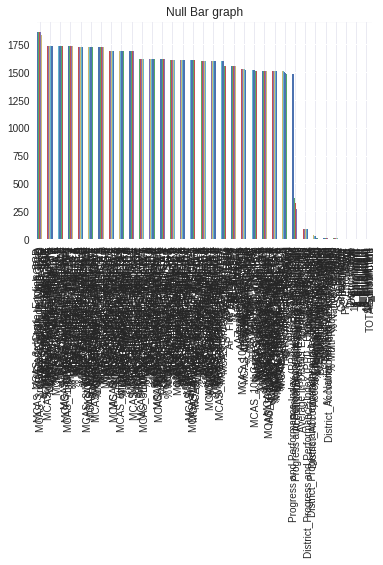

In [93]:
df_nulls.plot(kind='bar', title='Null Bar graph')

In [94]:
df.shape

(1861, 292)

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


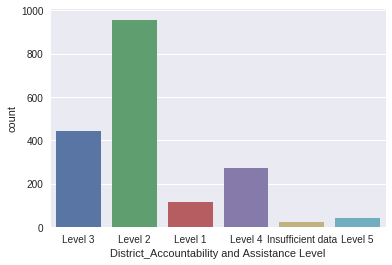

In [95]:
sns.countplot(x=df['District_Accountability and Assistance Level'])
#I am going to focus on schools that achieve a level 1 or above. I believe the state's lack of accountability for 
#a school at level 2 incentivizes schools to misreport those scores.

In [96]:
df.head(3)

,School Code,School Name,School Type,Town,State,Zip,Grade,District Name,District Code,PK_Enrollment,K_Enrollment,1_Enrollment,2_Enrollment,3_Enrollment,4_Enrollment,5_Enrollment,6_Enrollment,7_Enrollment,8_Enrollment,9_Enrollment,10_Enrollment,11_Enrollment,12_Enrollment,SP_Enrollment,TOTAL_Enrollment,First Language Not English,% First Language Not English,English Language Learner,% English Language Learner,Students With Disabilities,% Students With Disabilities,High Needs,% High Needs,Economically Disadvantaged,% Economically Disadvantaged,% African American,% Asian,% Hispanic,% White,% Native American,"% Native Hawaiian, Pacific Islander","% Multi-Race, Non-Hispanic",% Males,% Females,Total # of Classes,Average Class Size,Number of Students,Salary Totals,Average Salary,FTE Count,In-District Expenditures,Total In-district FTEs,Average In-District Expenditures per Pupil,Total Expenditures,Total Pupil FTEs,Average Expenditures per Pupil,# in Cohort,% Graduated,% Still in School,% Non-Grad Completers,% GED,% Dropped Out,% Permanently Excluded,High School Graduates (#),Attending Coll./Univ. (#),% Attending College,% Private Two-Year,% Private Four-Year,% Public Two-Year,% Public Four-Year,% MA Community College,% MA State University,% UMass,AP_Test Takers,AP_Tests Taken,AP_One Test,AP_Two Tests,AP_Three Tests,AP_Four Tests,AP_Five or More Tests,AP_Score=1,AP_Score=2,AP_Score=3,AP_Score=4,AP_Score=5,% AP_Score 1-2,% AP_Score 3-5,SAT_Tests Taken,Average SAT_Reading,Average SAT_Writing,Average SAT_Math,MCAS_3rdGrade_Math_P+A #,% MCAS_3rdGrade_Math_P+A,MCAS_3rdGrade_Math_A #,% MCAS_3rdGrade_Math_A,MCAS_3rdGrade_Math_P #,% MCAS_3rdGrade_Math_P,MCAS_3rdGrade_Math_NI #,% MCAS_3rdGrade_Math_NI,MCAS_3rdGrade_Math_W/F #,% MCAS_3rdGrade_Math_W/F,MCAS_3rdGrade_Math_Stud. Incl. #,MCAS_3rdGrade_Math_CPI,MCAS_4thGrade_Math_P+A #,% MCAS_4thGrade_Math_P+A,MCAS_4thGrade_Math_A #,% MCAS_4thGrade_Math_A,MCAS_4thGrade_Math_P #,% MCAS_4thGrade_Math_P,MCAS_4thGrade_Math_NI #,% MCAS_4thGrade_Math_NI,MCAS_4thGrade_Math_W/F #,% MCAS_4thGrade_Math_W/F,MCAS_4thGrade_Math_Stud. Incl. #,MCAS_4thGrade_Math_CPI,MCAS_4thGrade_Math_SGP,MCAS_4thGrade_Math_Incl. in SGP(#),MCAS_5thGrade_Math_P+A #,% MCAS_5thGrade_Math_P+A,MCAS_5thGrade_Math_A #,% MCAS_5thGrade_Math_A,MCAS_5thGrade_Math_P #,% MCAS_5thGrade_Math_P,MCAS_5thGrade_Math_NI #,% MCAS_5thGrade_Math_NI,MCAS_5thGrade_Math_W/F #,% MCAS_5thGrade_Math_W/F,MCAS_5thGrade_Math_Stud. Incl. #,MCAS_5thGrade_Math_CPI,MCAS_5thGrade_Math_SGP,MCAS_5thGrade_Math_Incl. in SGP(#),MCAS_6thGrade_Math_P+A #,% MCAS_6thGrade_Math_P+A,MCAS_6thGrade_Math_A #,% MCAS_6thGrade_Math_A,MCAS_6thGrade_Math_P #,% MCAS_6thGrade_Math_P,MCAS_6thGrade_Math_NI #,% MCAS_6thGrade_Math_NI,MCAS_6thGrade_Math_W/F #,% MCAS_6thGrade_Math_W/F,MCAS_6thGrade_Math_Stud. Incl. #,MCAS_6thGrade_Math_CPI,MCAS_6thGrade_Math_SGP,MCAS_6thGrade_Math_Incl. in SGP(#),MCAS_7thGrade_Math_P+A #,% MCAS_7thGrade_Math_P+A,MCAS_7thGrade_Math_A #,% MCAS_7thGrade_Math_A,MCAS_7thGrade_Math_P #,% MCAS_7thGrade_Math_P,MCAS_7thGrade_Math_NI #,% MCAS_7thGrade_Math_NI,MCAS_7thGrade_Math_W/F #,% MCAS_7thGrade_Math_W/F,MCAS_7thGrade_Math_Stud. Incl. #,MCAS_7thGrade_Math_CPI,MCAS_7thGrade_Math_SGP,MCAS_7thGrade_Math_Incl. in SGP(#),MCAS_8thGrade_Math_P+A #,% MCAS_8thGrade_Math_P+A,MCAS_8thGrade_Math_A #,% MCAS_8thGrade_Math_A,MCAS_8thGrade_Math_P #,% MCAS_8thGrade_Math_P,MCAS_8thGrade_Math_NI #,% MCAS_8thGrade_Math_NI,MCAS_8thGrade_Math_W/F #,% MCAS_8thGrade_Math_W/F,MCAS_8thGrade_Math_Stud. Incl. #,MCAS_8thGrade_Math_CPI,MCAS_8thGrade_Math_SGP,MCAS_8thGrade_Math_Incl. in SGP(#),MCAS_10thGrade_Math_P+A #,% MCAS_10thGrade_Math_P+A,MCAS_10thGrade_Math_A #,% MCAS_10thGrade_Math_A,MCAS_10thGrade_Math_P #,% MCAS_10thGrade_Math_P,MCAS_10thGrade_Math_NI #,% MCAS_10thGrade_Math_NI,MCAS_10thGrade_Math_W/F #,% MCAS_10thGrade_Math_W/F,MCAS_10thGrade_Math_Stud. Incl. #,MCAS_10thGrade_Math_CPI,MCAS_10thGrade_Math_SGP,MCAS_10thGrade_Math_Incl. in SGP(#),MCAS_3rdGrade_English_P+A #,% MCAS_3rdGrade_

In [97]:
df['State'].nunique()

1

In [98]:
df.drop(['State'], axis = 1, inplace=True)
df.shape

(1861, 291)

Now I want to see if I need to drop any rows

In [99]:
transposed = df.set_index('School Code').T
transposed.head()
transposed.isnull().sum();
#Do I want to drop rows though??

How can we fill certain nulls?

In [100]:
df.select_dtypes(include=object)
#I see that 'Accountability and Assistance description are both here... I might drop the 'description'
#column because I want to make the objects more measurable.
#Accountability levels indicate whether a school is meeting their 'close the gap' expectations
#What does it take to

,School Name,School Type,Town,Grade,District Name,AP_Test Takers,AP_Tests Taken,Accountability and Assistance Level,Accountability and Assistance Description,District_Accountability and Assistance Level,District_Accountability and Assistance Description
0,Abington High,Public School,Abington,"09,10,11,12",Abington,70,123,Level 1,Meeting gap narrowing goals,Level 3,One or more schools in the district classified...
1,Beaver Brook Elementary School,Public School,Abington,"01,02,03,04",Abington,NaN,NaN,Level 3,Among lowest performing 20% of subgroups,Level 3,One or more schools in the district classified...
2,Center Elementary School,Public School,Abington,"PK,K",Abington,NaN,NaN,Insufficient data,NaN,Level 3,One or more schools in the district classified...
3,Frolio Middle School,Public School,Abington,"07,08",Abington,NaN,NaN,Level 2,Not meeting gap narrowing goals,Level 3,One or more schools in the district classified...
4,Woodsdale Elementary School,Public School,Abington,"05,06",Abington,NaN,NaN,Level 2,Not meeting gap narrowing goals,Level 3,One or more schools in the district classified...
5,Acushnet Elementary School,Public School,Acushnet,"PK,K,01,02,03,04",Acushnet,NaN,NaN,Level 2,Not meeting gap narrowing goals,Level 2,One or more schools in the district classified...
6,Albert F Ford Middle School,Public School,Acushnet,"05,06,07,08",Acushnet,NaN,NaN,Level 2,Not meeting gap narrowing goals,Level 2,One or more schools in the district classified...
7,Agawam Early Childhood Center,Public School,Agawam,PK,Agawam,NaN,NaN,Insufficient data,NaN,Level 2,One or more schools in the district classified...
8,Agawam High,Public School,Agawam,"09,10,11,12",Agawam,242,452,Level 2,Not meeting gap narrowing goals,Level 2,One or more schools in the district classified...
9,Agawam Junior High,Public School,Feeding Hills,"07,08",Agawam,NaN,NaN,Level 2,Not meeting gap narrowing goals,Level 2,One or more schools in the district classified...


In [101]:
#df.drop('Accountability and Assistance Description', axis=1, inplace = True)
#Takes care of one object column...
df['AP_Test Takers'].fillna(value=0, inplace=True)

In [102]:
df['AP_Tests Taken'].fillna(value=0, inplace=True)
df['AP_Tests Taken'].dtype

dtype('O')

# Creating Middle School df:

In [103]:
df_middle=df.loc[(df['7_Enrollment'] !=0) & (df['2_Enrollment'] ==0)]
df_middle.shape

(373, 291)

## Middle School df Workspace:
- EDA, cleaning.

In [104]:
df_middle.head()

,School Code,School Name,School Type,Town,Zip,Grade,District Name,District Code,PK_Enrollment,K_Enrollment,1_Enrollment,2_Enrollment,3_Enrollment,4_Enrollment,5_Enrollment,6_Enrollment,7_Enrollment,8_Enrollment,9_Enrollment,10_Enrollment,11_Enrollment,12_Enrollment,SP_Enrollment,TOTAL_Enrollment,First Language Not English,% First Language Not English,English Language Learner,% English Language Learner,Students With Disabilities,% Students With Disabilities,High Needs,% High Needs,Economically Disadvantaged,% Economically Disadvantaged,% African American,% Asian,% Hispanic,% White,% Native American,"% Native Hawaiian, Pacific Islander","% Multi-Race, Non-Hispanic",% Males,% Females,Total # of Classes,Average Class Size,Number of Students,Salary Totals,Average Salary,FTE Count,In-District Expenditures,Total In-district FTEs,Average In-District Expenditures per Pupil,Total Expenditures,Total Pupil FTEs,Average Expenditures per Pupil,# in Cohort,% Graduated,% Still in School,% Non-Grad Completers,% GED,% Dropped Out,% Permanently Excluded,High School Graduates (#),Attending Coll./Univ. (#),% Attending College,% Private Two-Year,% Private Four-Year,% Public Two-Year,% Public Four-Year,% MA Community College,% MA State University,% UMass,AP_Test Takers,AP_Tests Taken,AP_One Test,AP_Two Tests,AP_Three Tests,AP_Four Tests,AP_Five or More Tests,AP_Score=1,AP_Score=2,AP_Score=3,AP_Score=4,AP_Score=5,% AP_Score 1-2,% AP_Score 3-5,SAT_Tests Taken,Average SAT_Reading,Average SAT_Writing,Average SAT_Math,MCAS_3rdGrade_Math_P+A #,% MCAS_3rdGrade_Math_P+A,MCAS_3rdGrade_Math_A #,% MCAS_3rdGrade_Math_A,MCAS_3rdGrade_Math_P #,% MCAS_3rdGrade_Math_P,MCAS_3rdGrade_Math_NI #,% MCAS_3rdGrade_Math_NI,MCAS_3rdGrade_Math_W/F #,% MCAS_3rdGrade_Math_W/F,MCAS_3rdGrade_Math_Stud. Incl. #,MCAS_3rdGrade_Math_CPI,MCAS_4thGrade_Math_P+A #,% MCAS_4thGrade_Math_P+A,MCAS_4thGrade_Math_A #,% MCAS_4thGrade_Math_A,MCAS_4thGrade_Math_P #,% MCAS_4thGrade_Math_P,MCAS_4thGrade_Math_NI #,% MCAS_4thGrade_Math_NI,MCAS_4thGrade_Math_W/F #,% MCAS_4thGrade_Math_W/F,MCAS_4thGrade_Math_Stud. Incl. #,MCAS_4thGrade_Math_CPI,MCAS_4thGrade_Math_SGP,MCAS_4thGrade_Math_Incl. in SGP(#),MCAS_5thGrade_Math_P+A #,% MCAS_5thGrade_Math_P+A,MCAS_5thGrade_Math_A #,% MCAS_5thGrade_Math_A,MCAS_5thGrade_Math_P #,% MCAS_5thGrade_Math_P,MCAS_5thGrade_Math_NI #,% MCAS_5thGrade_Math_NI,MCAS_5thGrade_Math_W/F #,% MCAS_5thGrade_Math_W/F,MCAS_5thGrade_Math_Stud. Incl. #,MCAS_5thGrade_Math_CPI,MCAS_5thGrade_Math_SGP,MCAS_5thGrade_Math_Incl. in SGP(#),MCAS_6thGrade_Math_P+A #,% MCAS_6thGrade_Math_P+A,MCAS_6thGrade_Math_A #,% MCAS_6thGrade_Math_A,MCAS_6thGrade_Math_P #,% MCAS_6thGrade_Math_P,MCAS_6thGrade_Math_NI #,% MCAS_6thGrade_Math_NI,MCAS_6thGrade_Math_W/F #,% MCAS_6thGrade_Math_W/F,MCAS_6thGrade_Math_Stud. Incl. #,MCAS_6thGrade_Math_CPI,MCAS_6thGrade_Math_SGP,MCAS_6thGrade_Math_Incl. in SGP(#),MCAS_7thGrade_Math_P+A #,% MCAS_7thGrade_Math_P+A,MCAS_7thGrade_Math_A #,% MCAS_7thGrade_Math_A,MCAS_7thGrade_Math_P #,% MCAS_7thGrade_Math_P,MCAS_7thGrade_Math_NI #,% MCAS_7thGrade_Math_NI,MCAS_7thGrade_Math_W/F #,% MCAS_7thGrade_Math_W/F,MCAS_7thGrade_Math_Stud. Incl. #,MCAS_7thGrade_Math_CPI,MCAS_7thGrade_Math_SGP,MCAS_7thGrade_Math_Incl. in SGP(#),MCAS_8thGrade_Math_P+A #,% MCAS_8thGrade_Math_P+A,MCAS_8thGrade_Math_A #,% MCAS_8thGrade_Math_A,MCAS_8thGrade_Math_P #,% MCAS_8thGrade_Math_P,MCAS_8thGrade_Math_NI #,% MCAS_8thGrade_Math_NI,MCAS_8thGrade_Math_W/F #,% MCAS_8thGrade_Math_W/F,MCAS_8thGrade_Math_Stud. Incl. #,MCAS_8thGrade_Math_CPI,MCAS_8thGrade_Math_SGP,MCAS_8thGrade_Math_Incl. in SGP(#),MCAS_10thGrade_Math_P+A #,% MCAS_10thGrade_Math_P+A,MCAS_10thGrade_Math_A #,% MCAS_10thGrade_Math_A,MCAS_10thGrade_Math_P #,% MCAS_10thGrade_Math_P,MCAS_10thGrade_Math_NI #,% MCAS_10thGrade_Math_NI,MCAS_10thGrade_Math_W/F #,% MCAS_10thGrade_Math_W/F,MCAS_10thGrade_Math_Stud. Incl. #,MCAS_10thGrade_Math_CPI,MCAS_10thGrade_Math_SGP,MCAS_10thGrade_Math_Incl. in SGP(#),MCAS_3rdGrade_English_P+A #,% MCAS_3rdGrade_Englis

In [105]:
#here I am creating a dummy column for traditional public vs. charter school
school_type_dummies_middle = pd.get_dummies(df_middle['School Type'])
df_middle = pd.concat([df_middle, school_type_dummies_middle], axis=1)
df_middle.shape

(373, 293)

In [106]:
df_middle['Progress and Performance Index (PPI) - All Students'].isnull().sum()

22

In [107]:
df_middle['Progress and Performance Index (PPI) - All Students'].fillna((df_middle['Progress and Performance Index (PPI) - All Students'].mean()), inplace=True)
df_middle['Progress and Performance Index (PPI) - All Students'].isnull().sum()

0

### Dropping columns with descriptive values and lots of missing information:

In [108]:
#These columns are being dropped because they either contain descriptive texts or are not
#relevant to middle schools. Or they contain multicolinearity
df_middle.drop(['Accountability and Assistance Level', 'Accountability and Assistance Description', 
              'District_Accountability and Assistance Description', 
              'District_Accountability and Assistance Level', 'AP_Test Takers',
             'AP_Tests Taken', 'Progress and Performance Index (PPI) - High Needs Students', 
             'District_Progress and Performance Index (PPI) - All Students', 
             'District_Progress and Performance Index (PPI) - High Needs Students'], axis=1, inplace=True)

In [109]:
df_middle.shape

(373, 284)

In [110]:
#dropping enrollment columns that are not in middle schools...
df_middle.drop(['PK_Enrollment', 'K_Enrollment', '1_Enrollment', '2_Enrollment', 
                '3_Enrollment', '4_Enrollment', '9_Enrollment', '10_Enrollment', 
                '11_Enrollment', '12_Enrollment'], axis=1, inplace=True)

In [111]:
df_middle.shape

(373, 274)

In [112]:
df_middle.dropna(thresh=200, axis=1, inplace=True)

In [113]:
df_middle.isnull().sum()

School Code                                             0
School Name                                             0
School Type                                             0
Town                                                    0
Zip                                                     0
Grade                                                   0
District Name                                           0
District Code                                           0
5_Enrollment                                            0
6_Enrollment                                            0
7_Enrollment                                            0
8_Enrollment                                            0
SP_Enrollment                                           0
TOTAL_Enrollment                                        0
First Language Not English                              0
% First Language Not English                            0
English Language Learner                                0
% English Lang

In [114]:
#df_middle.drop(['District_Accountability and Assistance Description', 'Accountability and Assistance Description'], axis=1, inplace=True)
#df_middle.drop(['Accountability and Assistance Description'], axis=1, inplace=True)

In [115]:
df_middle['School Accountability Percentile (1-99)'].fillna((df_middle['School Accountability Percentile (1-99)'].mean()), inplace=True)

In [116]:
df_middle['School Accountability Percentile (1-99)'].isnull().sum()

0

## Imputing column values:

In [117]:
def common_nulls_middle(df):
    for col in df.columns:
        if df[col].isnull().sum() == 30:
            df[col].fillna((df[col].mean()), inplace=True)
        elif df[col].isnull().sum() == 9:
            df[col].fillna((df[col].mean()), inplace=True)
        elif df[col].isnull().sum() == 29:
            df[col].fillna((df[col].mean()), inplace=True)
        elif df[col].isnull().sum() == 22:
            df[col].fillna((df[col].mean()), inplace=True)
    return df

In [118]:
common_nulls_middle(df_middle);

In [119]:
df_middle['In-District Expenditures'].isnull().sum()

0

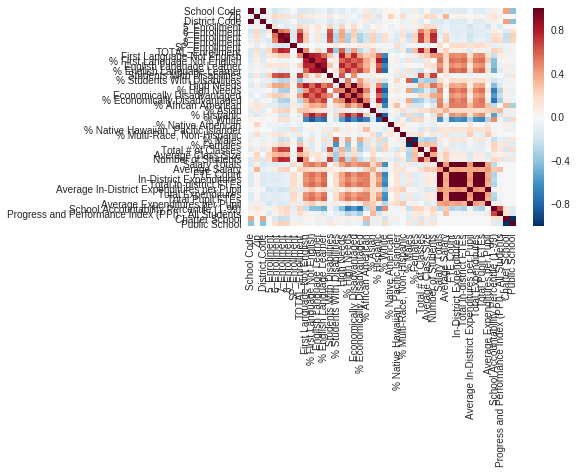

In [120]:
sns.heatmap(df_middle.corr())

### Model experimentation (middle school):

In [155]:
features_middle = df_middle.drop(['Progress and Performance Index (PPI) - All Students', 'High Needs', 
                         'English Language Learner', 'Students With Disabilities', 'School Name', 
                         'Town', 'Grade', 'Economically Disadvantaged', 'District Name', 'School Type',
                         'First Language Not English', 'School Accountability Percentile (1-99)',
                         '5_Enrollment', '6_Enrollment', '7_Enrollment', '8_Enrollment', 
                        'School Accountability Percentile (1-99)'], axis=1)

X_mid = features_middle
y_mid = df_middle['Progress and Performance Index (PPI) - All Students']
ss = StandardScaler()
X_mid_s = ss.fit_transform(X_mid)

In [123]:
features_middle.dtypes

School Code                                     int64
Zip                                             int64
District Code                                   int64
SP_Enrollment                                   int64
TOTAL_Enrollment                                int64
% First Language Not English                  float64
% English Language Learner                    float64
% Students With Disabilities                  float64
% High Needs                                  float64
% Economically Disadvantaged                  float64
% African American                            float64
% Asian                                       float64
% Hispanic                                    float64
% White                                       float64
% Native American                             float64
% Native Hawaiian, Pacific Islander           float64
% Multi-Race, Non-Hispanic                    float64
% Males                                       float64
% Females                   

In [124]:
optimal_lasso_mid = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso_mid.fit(X_mid_s, y_mid)

...................................................................................................................................................................................................................................................................................................................................................................................................................................................../opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
................................................................................................................................................................................................................................................................................................

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=500, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=1)

In [125]:
lasso_middle=Lasso(alpha=optimal_lasso_mid.alpha_)

lasso_middle_scores = cross_val_score(lasso_middle, X_mid_s, y_mid, cv=10)

print(lasso_middle_scores)
print(np.mean(lasso_middle_scores))

[ 0.31317586 -0.01664872  0.27402163  0.2152156  -0.07275437  0.08956472
  0.37903964  0.05869738  0.18525152  0.57694442]
0.2002507682128704


In [126]:
Lasso_coefs_middle = pd.DataFrame({
    'coef': optimal_lasso_mid.coef_,
    'variable':features_middle.columns
})
Lasso_coefs_middle.sort_values('coef', ascending=False, inplace=True)
Lasso_coefs_middle.head(20)

,coef,variable
11,2.833354,% Asian
23,2.826417,Average Salary
4,2.348940,TOTAL_Enrollment
31,2.005537,Charter School
7,1.105210,% Students With Disabilities
14,-0.000000,% Native American
21,-0.000000,Number of Students
24,-0.000000,FTE Count
25,-0.000000,In-District Expenditures
18,-0.000000,% Females


In [149]:
Lasso_coefs_middle.tail()

,coef,variable
30,-0.919212,Average Expenditures per Pupil
19,-1.930548,Total # of Classes
20,-2.735682,Average Class Size
13,-4.770378,% White
9,-9.287937,% Economically Disadvantaged


## Converting the target to 1 vs. 0 and running a random forest classification model:

In [127]:
df_middle_PPI_Level = df_middle
df_middle['Progress and Performance Index (PPI) - All Students'].head(10)

3     63.0
6     52.0
9     54.0
13    52.0
18    50.0
24    81.0
26    97.0
32    87.0
40    73.0
44    91.0
Name: Progress and Performance Index (PPI) - All Students, dtype: float64

In [128]:
df_middle_PPI_Level['PPI_met']=np.where(df_middle_PPI_Level['Progress and Performance Index (PPI) - All Students']>=75, 1, 0)
df_middle_PPI_Level['PPI_met'].head(10)

3     0
6     0
9     0
13    0
18    0
24    1
26    1
32    1
40    0
44    1
Name: PPI_met, dtype: int64

## Determining baseline prediction:

In [129]:
df_middle_PPI_Level['PPI_met'].value_counts()
#find baseline action

0    269
1    104
Name: PPI_met, dtype: int64

In [130]:
total_observations_middle = 269 + 104

In [131]:
baseline_middle = 269/total_observations_middle
baseline_middle

0.7211796246648794

## Creating a Random Forest Classifier model:

In [132]:
df_middle_PPI_Level.head()

,School Code,School Name,School Type,Town,Zip,Grade,District Name,District Code,5_Enrollment,6_Enrollment,7_Enrollment,8_Enrollment,SP_Enrollment,TOTAL_Enrollment,First Language Not English,% First Language Not English,English Language Learner,% English Language Learner,Students With Disabilities,% Students With Disabilities,High Needs,% High Needs,Economically Disadvantaged,% Economically Disadvantaged,% African American,% Asian,% Hispanic,% White,% Native American,"% Native Hawaiian, Pacific Islander","% Multi-Race, Non-Hispanic",% Males,% Females,Total # of Classes,Average Class Size,Number of Students,Salary Totals,Average Salary,FTE Count,In-District Expenditures,Total In-district FTEs,Average In-District Expenditures per Pupil,Total Expenditures,Total Pupil FTEs,Average Expenditures per Pupil,School Accountability Percentile (1-99),Progress and Performance Index (PPI) - All Students,Charter School,Public School,PPI_met
3,10405,Frolio Middle School,Public School,Abington,2351,"07,08",Abington,10000,0,0,159,169,0,328,18.0,5.5,6.0,1.8,43.0,13.1,101.0,30.8,71.0,21.6,2.4,1.8,6.1,89.3,0.0,0.0,0.3,53.4,46.6,218.0,21.1,342.0,9489496.0,74662.0,127.0,23365711.18,1939.0,12050.39,27229100.80,2051.8,13270.84,40.0,63.0,0,1,0
6,30305,Albert F Ford Middle School,Public School,Acushnet,2743,"05,06,07,08",Acushnet,30000,105,121,77,114,0,417,4.0,1.0,2.0,0.5,57.0,13.7,122.0,29.3,82.0,19.7,0.7,0.2,1.0,97.4,0.0,0.0,0.7,50.8,49.2,309.0,16.9,426.0,4543438.0,64906.0,70.0,10825382.24,967.5,11189.03,15201154.44,1281.7,11860.15,53.0,52.0,0,1,0
9,50405,Agawam Junior High,Public School,Feeding Hills,1030,"07,08",Agawam,50000,0,0,253,309,0,562,35.0,6.2,6.0,1.1,84.0,14.9,194.0,34.5,131.0,23.3,1.4,1.4,7.1,87.0,0.0,0.0,3.0,47.9,52.1,847.0,11.8,607.0,20849537.0,64769.0,322.0,53871628.43,3976.8,13546.48,59044278.63,4110.8,14363.21,30.0,54.0,0,1,0
13,50303,Roberta G. Doering School,Public School,Agawam,1001,"05,06,07,08",Agawam,50000,290,304,3,2,0,599,59.0,9.8,28.0,4.7,91.0,15.2,246.0,41.1,180.0,30.1,2.5,4.2,7.0,83.3,0.0,0.0,3.0,53.4,46.6,348.0,16.8,598.0,20849537.0,64769.0,322.0,53871628.43,3976.8,13546.48,59044278.63,4110.8,14363.21,54.0,52.0,0,1,0
18,70013,Amesbury Middle,Public School,Amesbury,1913,"05,06,07,08",Amesbury,70000,173,158,178,170,0,679,21.0,3.1,11.0,1.6,120.0,17.7,231.0,34.0,152.0,22.4,1.2,1.0,6.6,86.9,0.3,0.1,3.8,51.1,48.9,410.0,18.4,696.0,12158388.0,77147.0,158.0,29541449.55,2272.2,13001.25,33668081.30,2444.7,13771.87,50.0,50.0,0,1,0


In [156]:
features_rf_middle = df_middle_PPI_Level.drop(['Progress and Performance Index (PPI) - All Students', 'High Needs', 
                         'English Language Learner', 'Students With Disabilities', 'School Name', 
                         'Town', 'Grade', 'Economically Disadvantaged', 'District Name', 'School Type',
                         'First Language Not English', 'School Accountability Percentile (1-99)',
                         '5_Enrollment', '6_Enrollment', '7_Enrollment', '8_Enrollment', 'PPI_met', 'School Accountability Percentile (1-99)'], axis=1)
X_rf_middle = features_rf_middle
y_rf_middle = df_middle_PPI_Level['PPI_met']

X_train_middle, X_test_middle, y_train_middle, y_test_middle = train_test_split(X_rf_middle, y_rf_middle.values, test_size=0.33, random_state=42)

X_train_rf_middle_s = ss.fit_transform(X_train_middle)
X_test_rf_middle_s = ss.fit_transform(X_test_middle)

In [146]:
rf = RandomForestClassifier(random_state=42, criterion='gini')
rf_params = {
    'n_estimators': [5, 10, 15, 20, 25],
    'max_depth': [None, 1, 2, 3],
    'max_features': ['auto', 'log2']
}
gs_rf = GridSearchCV(rf, rf_params)
gs_rf.fit(X_train_rf_middle_s, y_train_middle)
print(gs_rf.best_score_)
print(gs_rf.best_params_)

0.8112449799196787
{'max_depth': 3, 'max_features': 'auto', 'n_estimators': 15}


In [147]:
rf.fit(X_train_rf_middle_s, y_train_middle)
rf.feature_importances_

array([0.01747754, 0.02565123, 0.01814337, 0.00019324, 0.03780449,
       0.02081187, 0.01674307, 0.07724528, 0.08468042, 0.10710297,
       0.02824066, 0.07030497, 0.03948479, 0.03547461, 0.00783656,
       0.01011045, 0.02661998, 0.03371969, 0.02612501, 0.04720159,
       0.02098712, 0.04712445, 0.02668578, 0.04237698, 0.01566973,
       0.02599526, 0.01181861, 0.01816275, 0.01552221, 0.02180801,
       0.01821745, 0.00465985, 0.        ])

                                            importance
feature                                               
% Economically Disadvantaged                     0.107
% High Needs                                     0.085
% Students With Disabilities                     0.077
% Asian                                          0.070
Number of Students                               0.047
Total # of Classes                               0.047
Average Salary                                   0.042
% Hispanic                                       0.039
TOTAL_Enrollment                                 0.038
% White                                          0.035
% Males                                          0.034
% African American                               0.028
% Multi-Race, Non-Hispanic                       0.027
Salary Totals                                    0.027
In-District Expenditures                         0.026
Zip                                              0.026
% Females 

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_core.py:186: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


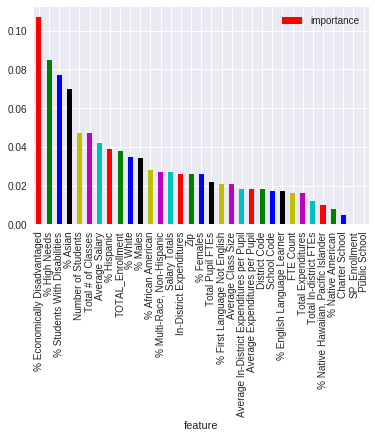

In [148]:
importances_middle = rf.feature_importances_
indices = np.argsort(importances_middle)[::-1]

importances_middle_df = pd.DataFrame({'feature':X_rf_middle.columns,'importance':np.round(importances_middle,3)})
importances_middle_df = importances_middle_df.sort_values('importance',ascending=False).set_index('feature')
print(importances_middle_df)
my_colors= 'rgbkymc'
importances_middle_df.plot(kind = 'bar', colors=my_colors)

## Logistic Regression on Middle:

In [154]:
logreg = LogisticRegression()

X_middle_log_ss = ss.fit_transform(features_rf_middle)
y_middle_log = df_middle_PPI_Level['PPI_met']

model_log_middle = logreg.fit(X_middle_log_ss, y_middle_log)

print(model_log_middle.coef_)

logreg_coefs_middle = pd.DataFrame({'log_coefs_middle': model_log_middle.coef_[0], 'features_middle': features_rf_middle.columns})
logreg_coefs_middle
score=logreg.score(X_middle_log_ss, y_middle_log)
print(score)
logreg_coefs_middle.sort_values(by=['log_coefs_middle'])

[[-0.13309526 -0.47990018 -0.13309025 -0.40122485  0.67952323  0.3738307
  -0.20287798  0.18386778 -0.68177127 -1.56395472  0.47960975  0.53656958
   0.28955865 -0.57037967 -0.00375874 -0.27371586 -0.33874311  0.11382166
   0.08994473 -0.5747008  -0.38495881 -0.13447573 -0.58323327  0.56081679
   0.82317773 -0.2470937   0.54150708  0.37819802 -0.61846829  0.11351055
  -0.44465164  0.09545782 -0.09545782]]
0.8176943699731903


,features_middle,log_coefs_middle
9,% Economically Disadvantaged,-1.563955
8,% High Needs,-0.681771
28,Total Expenditures,-0.618468
22,Salary Totals,-0.583233
19,Total # of Classes,-0.574701
13,% White,-0.570380
1,Zip,-0.479900
30,Average Expenditures per Pupil,-0.444652
3,SP_Enrollment,-0.401225
20,Average Class Size,-0.384959


### Converting middle dataframe to .csv

In [138]:
df_middle_PPI_Level.to_csv('Mass_Educ_data_middle_schools_class.csv', index=False)

In [139]:
df_middle.to_csv('Mass_Educ_data_middle_schools_reg.csv', index=False)

# Junk...

In [140]:
#df['AP_Tests Taken'] = df['AP_Tests Taken'].str.replace(',', '')
#df['AP_Tests Taken'] = df['AP_Tests Taken'].replace(nan, '')
#df['AP_Tests Taken'].astype(int)